In [35]:
#another example
import numpy as np
import pandas as pd
from rfgap import RFGAP
import seaborn as sns
import matplotlib.pyplot as plt
from rfphate import RFPHATE, dataprep

In [36]:
data = pd.read_csv("./datasets/heart_disease.csv")
data

,class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,2,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,3,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,1,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [37]:
heart_disease = data.drop(['ca', 'thal','sex', 'fbs', 'exang'], axis=1)
heart_disease

,class,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,0,63,1,145,233,2,150,2.3,3
1,2,67,4,160,286,2,108,1.5,2
2,1,67,4,120,229,2,129,2.6,2
3,0,37,3,130,250,0,187,3.5,3
4,0,41,2,130,204,2,172,1.4,1
...,...,...,...,...,...,...,...,...,...
298,1,45,1,110,264,0,132,1.2,2
299,2,68,4,144,193,0,141,3.4,2
300,3,57,4,130,131,0,115,1.2,2
301,1,57,2,130,236,2,174,0.0,2


In [38]:
# x = heart_disease.iloc[:,1:-2]
# y = heart_disease.iloc[:,0]
x = heart_disease.iloc[:,1:]
y = heart_disease['class']

In [39]:
x

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,63,1,145,233,2,150,2.3,3
1,67,4,160,286,2,108,1.5,2
2,67,4,120,229,2,129,2.6,2
3,37,3,130,250,0,187,3.5,3
4,41,2,130,204,2,172,1.4,1
...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,1.2,2
299,68,4,144,193,0,141,3.4,2
300,57,4,130,131,0,115,1.2,2
301,57,2,130,236,2,174,0.0,2


In [40]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: class, Length: 303, dtype: int64

<Axes: xlabel='age', ylabel='chol'>

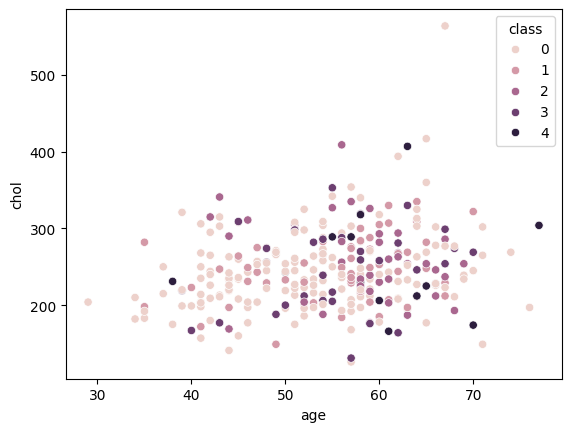

In [41]:
sns.scatterplot(x = x.iloc[:, 0], y = x.iloc[:, 3], hue = y)

In [42]:
print(heart_disease[heart_disease["class"] == 0].shape[0])
print(heart_disease[heart_disease["class"] == 1].shape[0])
print(heart_disease[heart_disease["class"] == 2].shape[0])
print(heart_disease[heart_disease["class"] == 3].shape[0])
print(heart_disease[heart_disease["class"] == 4].shape[0])

164
55
36
35
13


In [43]:
from rfoversample import RFOversample
HDOversample = RFOversample(heart_disease, 0)

In [44]:
x_upsampled, y_upsampled = HDOversample.fit()

In [45]:
print(y_upsampled[y_upsampled == 0].shape[0])
print(y_upsampled[y_upsampled == 1].shape[0])
print(y_upsampled[y_upsampled == 2].shape[0])
print(y_upsampled[y_upsampled == 3].shape[0])
print(y_upsampled[y_upsampled == 4].shape[0])

164
164
164
164
164


<Axes: xlabel='chol', ylabel='thalach'>

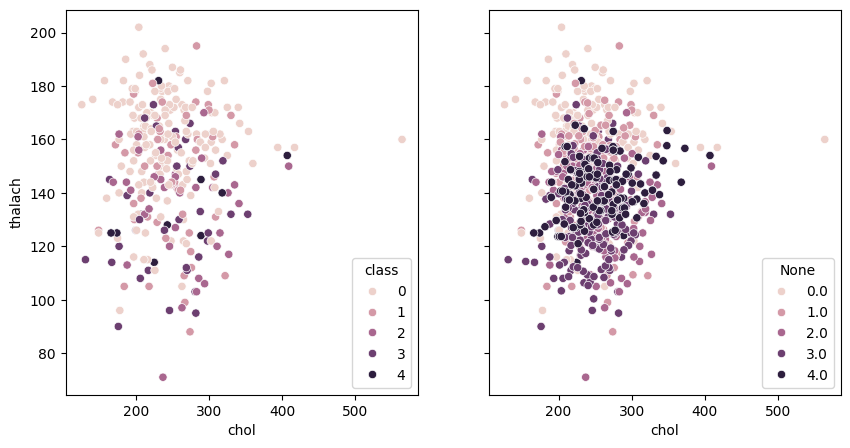

In [46]:
fig, ax = plt.subplots(1, 2,  figsize = (10, 5), sharey = True)

sns.scatterplot(x = x.iloc[:, 3], y = x.iloc[:, 5], hue = y, ax = ax[0])
sns.scatterplot(x = x_upsampled.iloc[:, 3], y = x_upsampled.iloc[:, 5], hue = y_upsampled, ax = ax[1])

In [47]:
y_upsampled.name = "class"
upsampled_heart_disease = pd.concat([y_upsampled, x_upsampled], axis = 1)
upsampled_heart_disease

,class,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope
0,0.0,63.000000,1.000000,145.000000,233.000000,2.000000,150.000000,2.300000,3.000000
1,2.0,67.000000,4.000000,160.000000,286.000000,2.000000,108.000000,1.500000,2.000000
2,1.0,67.000000,4.000000,120.000000,229.000000,2.000000,129.000000,2.600000,2.000000
3,0.0,37.000000,3.000000,130.000000,250.000000,0.000000,187.000000,3.500000,3.000000
4,0.0,41.000000,2.000000,130.000000,204.000000,2.000000,172.000000,1.400000,1.000000
...,...,...,...,...,...,...,...,...,...
815,4.0,58.333333,4.000000,158.333333,328.333333,2.000000,141.000000,1.933333,2.000000
816,4.0,69.333333,4.000000,136.000000,214.666667,1.333333,137.333333,2.066667,2.000000
817,4.0,63.666667,3.666667,135.666667,270.333333,1.333333,148.000000,3.033333,2.333333
818,4.0,66.000000,4.000000,145.000000,268.333333,2.000000,139.333333,1.000000,1.666667


In [48]:
x_phate_upsampled, y_phate_upsampled = dataprep(upsampled_heart_disease, label_col_idx=0)
x_phate, y_phate = dataprep(heart_disease, label_col_idx=0)


In [49]:
rfphate_upsampled = RFPHATE(random_state = 42)
rfphate_original = RFPHATE(random_state = 42)

In [50]:
from phate import PHATE
phate_upsampled = PHATE(random_state = 42)
phate_original = PHATE(random_state = 42)

In [51]:
phate_embedding_upsampled = phate_upsampled.fit_transform(x_phate_upsampled)
phate_embedding = phate_original.fit_transform(x_phate)

Calculating PHATE...
  Running PHATE on 820 observations and 8 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...


/yunity/bhumph1/miniconda3/envs/rfoversample-oldPandas/lib/python3.8/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 33 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Automatically selected t = 23
  Calculated optimal t in 0.36 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.05 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.90 seconds.
Calculated PHATE in 1.37 seconds.
Calculating PHATE...
  Running PHATE on 303 observations and 8 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.07 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.19 seconds.
Calculated PHATE in 0.30 seconds.


In [52]:
embedding_upsampled = rfphate_upsampled.fit_transform(x_phate_upsampled, y_phate_upsampled)
embedding = rfphate_original.fit_transform(x_phate, y_phate)


Text(0.5, 1.0, 'Upsampled Data RFPHATE Embedding')

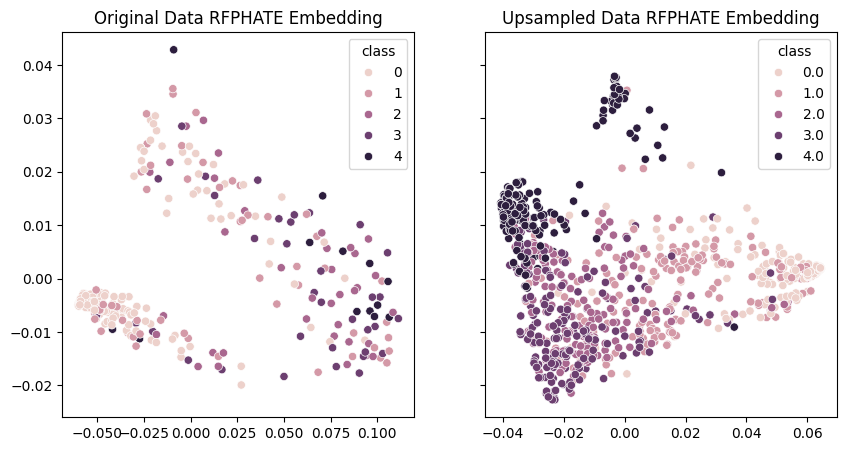

In [53]:
fig, ax = plt.subplots(1, 2,  figsize = (10, 5), sharey = True)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y_phate, ax=ax[0], )
sns.scatterplot(x=embedding_upsampled[:, 0], y=embedding_upsampled[:, 1], hue=y_phate_upsampled, ax=ax[1])
ax[0].set_title("Original Data RFPHATE Embedding")
ax[1].set_title("Upsampled Data RFPHATE Embedding")

Text(0.5, 1.0, 'Upsampled Data PHATE Embedding')

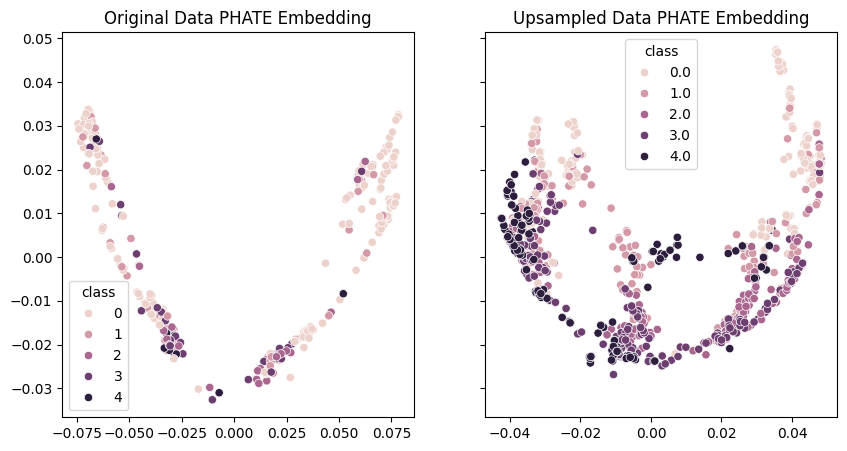

In [54]:
fig, ax = plt.subplots(1, 2,  figsize = (10, 5), sharey = True)

sns.scatterplot(x=phate_embedding[:, 0], y=phate_embedding[:, 1], hue=y, ax=ax[0])
sns.scatterplot(x=phate_embedding_upsampled[:, 0], y=phate_embedding_upsampled[:, 1], hue=y_upsampled, ax=ax[1])
ax[0].set_title("Original Data PHATE Embedding")
ax[1].set_title("Upsampled Data PHATE Embedding")